In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime

from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt

import copy 

import warnings
warnings.filterwarnings('ignore')

##### I will use the ordinal dataframe to make a heat map just to get an idea of potential EDA  ##TODO.... check if this is the case

In [2]:
#oridinal dataframe
df = pd.read_csv('Data/Crime_data/Other/c_crime_2.csv')
df = df.drop('New Georeferenced Column', axis = 1)
df.head()

,ARREST_DATE,WeekDay,Month,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2020-03-01,6,3,2,1,70,0,1,2,40.647951,-73.960606
1,2020-03-01,6,3,0,4,120,2,1,5,40.645023,-74.077217
2,2020-03-01,6,3,2,0,42,1,1,2,40.829510,-73.888056
3,2020-03-01,6,3,2,1,73,2,0,2,40.672574,-73.910176
4,2020-03-01,6,3,0,3,113,1,1,2,40.677514,-73.789838


In [3]:
#adding covid_wave column to the dataframe
df_covid_wave = pd.read_csv('Data/Covid_data/covid_wave.csv')
df['COVID_WAVE'] = df_covid_wave['COVID_WAVE']
df

,ARREST_DATE,WeekDay,Month,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,COVID_WAVE
0,2020-03-01,6,3,2,1,70,0,1,2,40.647951,-73.960606,0
1,2020-03-01,6,3,0,4,120,2,1,5,40.645023,-74.077217,0
2,2020-03-01,6,3,2,0,42,1,1,2,40.829510,-73.888056,0
3,2020-03-01,6,3,2,1,73,2,0,2,40.672574,-73.910176,0
4,2020-03-01,6,3,0,3,113,1,1,2,40.677514,-73.789838,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122868,2021-02-28,6,2,2,2,13,2,1,1,40.736698,-73.983316,1
122869,2021-02-28,6,2,1,0,44,0,1,2,40.836950,-73.927117,1
122870,2021-02-28,6,2,0,2,14,1,1,2,40.753875,-73.984820,1
122871,2021-02-28,6,2,2,0,43,1,1,3,40.823387,-73.870170,1


In [4]:
#I will also upload the dataframe without ordinals for some plots (master dataframe with both pre_covid and covid crimes )
data = pd.read_csv('Data/EDA_data/covid_crime.csv')
data.head()

,ARREST_DATE,WeekDay,Month,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column
0,2020-03-01,6,3,Severe,Brooklyn,70,18-24,M,BLACK,40.647951,-73.960606,POINT (-73.96060645599994 40.64795139700004)
1,2020-03-01,6,3,Minor,Staten Island,120,45-64,M,WHITE HISPANIC,40.645023,-74.077217,POINT (-74.077216847 40.645022746000045)
2,2020-03-01,6,3,Severe,Bronx,42,25-44,M,BLACK,40.829510,-73.888056,POINT (-73.88805604799995 40.829510293000055)
3,2020-03-01,6,3,Severe,Brooklyn,73,45-64,F,BLACK,40.672574,-73.910176,POINT (-73.91017639799998 40.67257395100007)
4,2020-03-01,6,3,Minor,Queens,113,25-44,M,BLACK,40.677514,-73.789838,POINT (-73.78983757299993 40.67751412800004)


In [5]:
# adding COVID_WAVE column to the data
data['COVID_WAVE'] = df_covid_wave['COVID_WAVE']
data

,ARREST_DATE,WeekDay,Month,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column,COVID_WAVE
0,2020-03-01,6,3,Severe,Brooklyn,70,18-24,M,BLACK,40.647951,-73.960606,POINT (-73.96060645599994 40.64795139700004),0
1,2020-03-01,6,3,Minor,Staten Island,120,45-64,M,WHITE HISPANIC,40.645023,-74.077217,POINT (-74.077216847 40.645022746000045),0
2,2020-03-01,6,3,Severe,Bronx,42,25-44,M,BLACK,40.829510,-73.888056,POINT (-73.88805604799995 40.829510293000055),0
3,2020-03-01,6,3,Severe,Brooklyn,73,45-64,F,BLACK,40.672574,-73.910176,POINT (-73.91017639799998 40.67257395100007),0
4,2020-03-01,6,3,Minor,Queens,113,25-44,M,BLACK,40.677514,-73.789838,POINT (-73.78983757299993 40.67751412800004),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122868,2021-02-28,6,2,Severe,Manhatten,13,45-64,M,ASIAN / PACIFIC ISLANDER,40.736698,-73.983316,POINT (-73.98331602599995 40.736698070000045),1
122869,2021-02-28,6,2,Mild,Bronx,44,18-24,M,BLACK,40.836950,-73.927117,POINT (-73.92711678499995 40.836949576000045),1
122870,2021-02-28,6,2,Minor,Manhatten,14,25-44,M,BLACK,40.753875,-73.984820,POINT (-73.98482043999996 40.75387492400005),1
122871,2021-02-28,6,2,Severe,Bronx,43,25-44,M,BLACK HISPANIC,40.823387,-73.870170,POINT (-73.87017045 40.82338729100008),1


In [6]:
#Let us see a quick heat correlation map
scaler = StandardScaler()
df2 = copy.deepcopy(df[['Crime Severity', 'ARREST_BORO', 'ARREST_PRECINCT',
                        'AGE_GROUP','PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude', 'COVID_WAVE']])
df2

,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,COVID_WAVE
0,2,1,70,0,1,2,40.647951,-73.960606,0
1,0,4,120,2,1,5,40.645023,-74.077217,0
2,2,0,42,1,1,2,40.829510,-73.888056,0
3,2,1,73,2,0,2,40.672574,-73.910176,0
4,0,3,113,1,1,2,40.677514,-73.789838,0
...,...,...,...,...,...,...,...,...,...
122868,2,2,13,2,1,1,40.736698,-73.983316,1
122869,1,0,44,0,1,2,40.836950,-73.927117,1
122870,0,2,14,1,1,2,40.753875,-73.984820,1
122871,2,0,43,1,1,3,40.823387,-73.870170,1


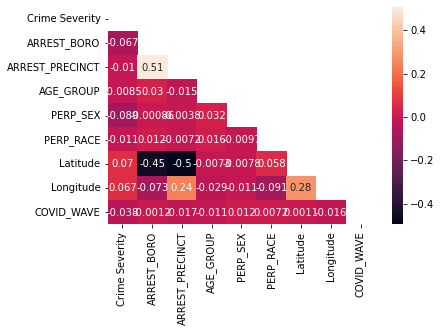

In [7]:
scaler.fit(df2)
matrix_corr = df2.corr()
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))
sns.heatmap(matrix_corr, annot=True, mask = mask)
plt.show()

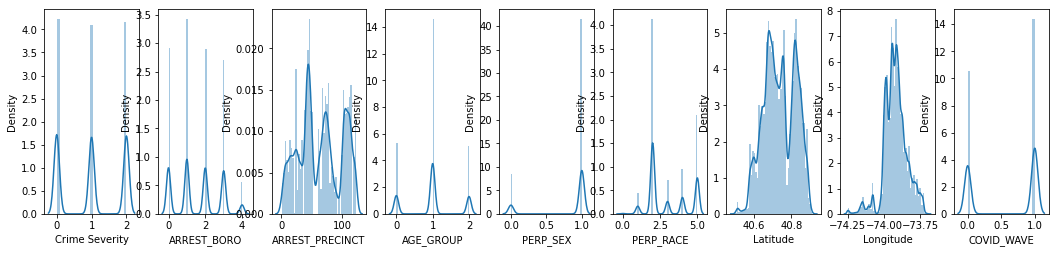

In [8]:
#Check distribution skewness
l = df2.columns.values
number_of_columns=9
number_of_rows = int(len(l)-1/number_of_columns)

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

In [9]:
#### NOTE: The second covid wave has greater crime density.

### Specifically looking at dates

In [10]:
#add weekday and month to this table
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE']) #convert column
df['Month'] = df['ARREST_DATE'].dt.month
df['WeekDay'] = df['ARREST_DATE'].dt.weekday

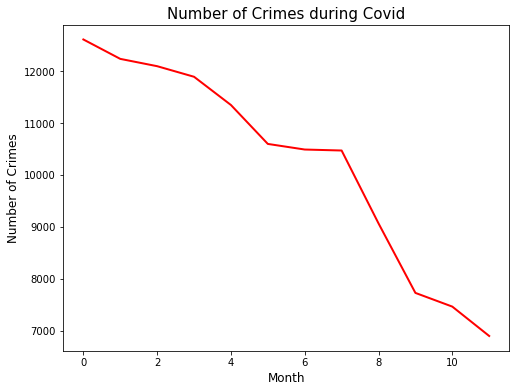

In [11]:
#Bar plot of number of offenses each Day
plt.figure(figsize=[8,6])
plt.plot(df['Month'].value_counts().values, color = 'red', lw = 2) #array of y values; dates
plt.xlabel('Month', size = 12)
plt.ylabel('Number of Crimes', size = 12)
plt.title('Number of Crimes during Covid', size= 15)
plt.show()

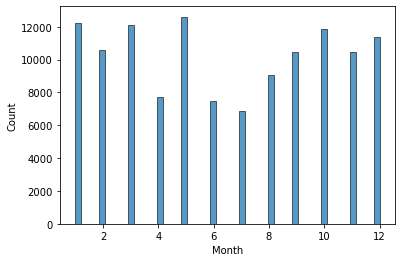

In [12]:
#A histogram showing the distribution of number of crimes over date, 52 bins=52weeks #TODO: Not sure if Im doing it right
sns.histplot(data=df, x = df['Month'], bins=52)

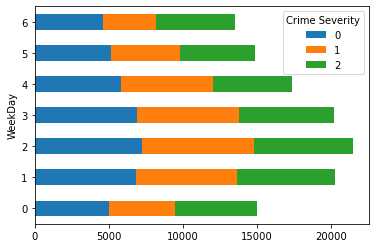

In [13]:
#Bar plot showing proportion of crimes committed per age group for crime severity
pd.crosstab(df['WeekDay'],df['Crime Severity']).plot(kind="barh",stacked=True)

In [14]:
# add weekday and month into data
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE']) #convert column
data['Month'] = data['ARREST_DATE'].dt.month
data['WeekDay'] = data['ARREST_DATE'].dt.weekday

### Correlation Hypothesis Tests

In [15]:
#Trying some stats

#first tabulate a 2 way table with variables as days of week and level of crime
two_way_table = pd.crosstab(index=data["WeekDay"], columns=data["Crime Severity"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0]) #amount of difference btw observed counts and counts expected if no relationship (low value = high corr)
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2]) #max number of logicailly independent values
#print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 589.9773453533634
p-value : 1.4631584127367934e-118
degrees of freedom : 12


Crime Severity,Mild,Minor,Severe
WeekDay,,,
0,-8.195283,-0.789168,8.953683
1,2.922162,0.196492,-3.107337
2,8.483212,-0.753524,-7.691430
3,4.357427,1.318439,-5.663174
4,8.889712,-1.535581,-7.310997
5,-4.132969,1.369687,2.740552
6,-15.949226,0.227788,15.654361


In [16]:
#define function to find if p exported from stats.chi_contency is significant

def chi_significant(p):
    """
    Function to test if the p value is significant based on the Chi2 Contingency test
    """
    prob = 0.95
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H)')

In [17]:
#use chi significance function
chi_significant(p)

significance=0.050, p=0.000
Dependent (reject H0)


#### The Chi-Square test above shows that there is a significant relationship on the dependency between crime severity and the day of the week, meaning there is a distribution of crime.

1. Monday (0) Crimes happens slightly more than on Sunday but still overally less. Significantly more likely to be severe. 
2. Tuesday (1) The Crimes more likely to happen are mild
3. Wednesday (2) Crimes are significantly more likely to be mild.
4. Thursday (3) Crimes are more likely to be mild and minor.
5. Friday (4) Crimes are significantly more likely to be mild.
6. Saturday (5) Crimes are more likely to be severe and minor. 
7. Sunday(6) Overall less crimes happens on Sunday, and crimes are significantly more likely to be severe. Severe crimes are at peak this day. 

Overall:
    
    Monday, Saturday and Sunday is when the severe crimes significantly occur and peaks on Sunday.
    Tuesday to Friday is when mild crimes significantly occur compared to severe crimes.
    Friday to Sunday is when minor crimes signifcantly occur than mild crimes
    
Therefore, we could interpret possible patterns. Such as people are more likely to let loose are weekends or interact with others more that might lead to more severe crime.

In [18]:
#perform one-way ANOVA - all our values are categorical, we would need quantitative variable for 2-way ANOVA
f_oneway(df['WeekDay'], df['Crime Severity'], df['ARREST_BORO'])

F_onewayResult(statistic=58822.555623153414, pvalue=0.0)

This shows that there is a significant relationship between the day of the week, crime severity and the borough

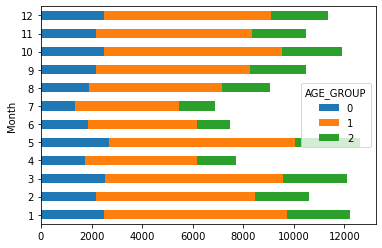

In [19]:
#Bar plot showing proportion of crimes committed per age group for crime severity
pd.crosstab(df['Month'],df['AGE_GROUP']).plot(kind="barh",stacked=True)

In [20]:
#first tabulate a 2 way table with variables as months and level of crime
two_way_table = pd.crosstab(index=data["Month"], columns=data["Crime Severity"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 917.460163587361
p-value : 6.940911893034008e-180
degrees of freedom : 22


Crime Severity,Mild,Minor,Severe
Month,,,
1,1.857992,6.890615,-8.769019
2,-1.971749,6.112418,-4.173788
3,-2.064993,8.924812,-6.904800
4,1.357670,-2.471242,1.129287
5,8.569637,-2.470903,-6.053110
6,-1.328703,-9.768803,11.131857
7,-11.952328,-6.423853,18.352823
8,-2.420424,-5.823425,8.257573
9,4.343931,-5.619463,1.316477


The Chi-Square test above shows that there is a significant relationship on the dependency between crime severity and the Month of the year, meaning there is a distribution of crime.

1. Jan - There are significantly more mild and minor crimes, and we see signifcantly more minor
2. Feb - It is similar to January but with significantly less mild crimes.
3. March - Significantly more minor crimes than Feb 
4. April - Slightly Significantly, crimes more likely to be severe or mild
5. May - Crimes are more significantly to be Minor
6. June - Significantly, crimes more likely to severe
7. July - Crimes are significantly more likely to be severe
8. Aug - Significantly more likely to be severe, but less than July
9. Sept - Crimes are significantly more likely to be mild
10. Oct - Signifantly more likely to be mild 
11. Nov - Signifantly more likely to be minor
12. Dec - Crimes are significantly more likely to be minor

Common trends we can see:

    The highest amount of severe crimes are committed in July, June, Aug and April respectively.
    The highest amount of mild crimes are committed in May, October, September respectively and slightly in January and April.  
    The minor crimes seem to be more likely to significantly occurring from November to March
 
Common trends during covid waves:

    For the first covid wave (March-June 2020): Severe crimes occur at the beginning and end of the wave. 
    For the second covid wave (Nov-May(Feb in dataframe) 2021): Most minor crimes occur during this wave. 
    Severe and mild crimes tend to occur mostly outside of the waves except for the beginning and end of the first wave. 
 
Therefore, mostly resources/financially related minor crimes are done during the waves like roberry etc with the exception of the beginning and end of the first wave where there was serious crimes. 

In [21]:
#use chi significance function
chi_significant(p)

significance=0.050, p=0.000
Dependent (reject H0)


In [22]:
#perform one-way ANOVA 
f_oneway(df['Month'], df['Crime Severity'], df['ARREST_BORO'])

F_onewayResult(statistic=220165.120177804, pvalue=0.0)

Again we see that these values are significant!

In [30]:
#Create new variable using group by and get value counts for each type
month_crime = month.groupby('Month')['Crime Severity'].value_counts()
#create other varian;e calculting the grouped proportions
month_crime = month_crime.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
month_crime

Month  Crime Severity
Apr    Severe            33.915858
       Mild              33.488673
       Minor             32.595469
Aug    Severe            37.264203
       Mild              31.638169
       Minor             31.097628
Dec    Minor             36.109642
       Severe            32.328574
       Mild              31.561784
Feb    Minor             36.570404
       Mild              31.927142
       Severe            31.502454
Jan    Minor             36.681651
       Mild              33.534941
       Severe            29.783408
Jul    Severe            43.451777
       Minor             30.326323
       Mild              26.221900
Jun    Severe            39.217263
       Mild              32.086852
       Minor             28.695885
Mar    Minor             37.531007
       Mild              31.949727
       Severe            30.519266
May    Mild              36.180506
       Minor             32.897137
       Severe            30.922357
Nov    Minor             36.07932

### Relations with Borough

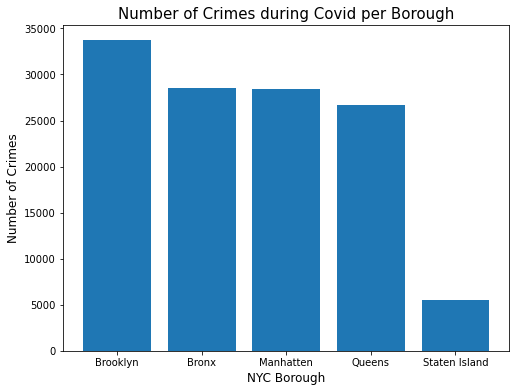

In [23]:
#Bar plot of number of offenses in each borrow
plt.figure(figsize=[8,6])
plt.bar(data['ARREST_BORO'].value_counts().index.tolist(), 
        data['ARREST_BORO'].value_counts().values)
plt.xlabel('NYC Borough', size = 12)
plt.ylabel('Number of Crimes', size = 12)
plt.title('Number of Crimes during Covid per Borough', size= 15)
plt.show()

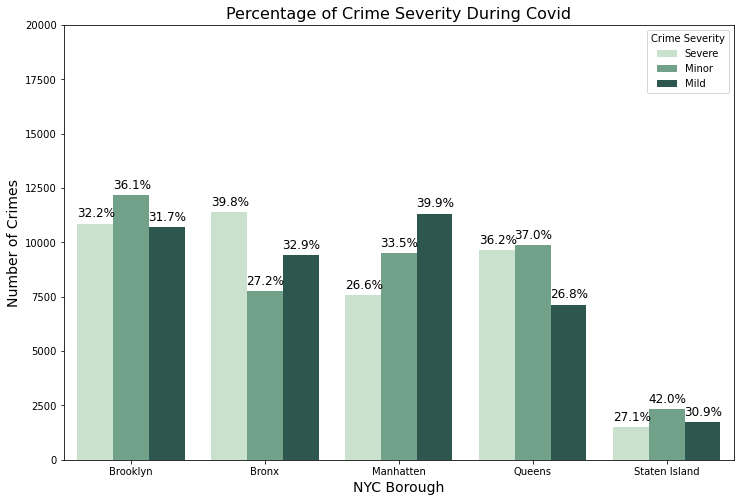

In [26]:
#Calculating the percentage of crime severity at each borough
boro_name = ['Manhatten', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
crime_level = ['Minor', 'Mild', 'Severe']
subtotal_boro = data.groupby('ARREST_BORO')['Crime Severity'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="ARREST_BORO", hue="Crime Severity", 
                   data=data[['ARREST_BORO', 'Crime Severity']], 
                   order = subtotal_boro.index,
                  palette = "ch:2.5,-.2,dark=.3")
ax.set_xlabel('NYC Borough', fontsize = 14)
ax.set_ylabel('Number of Crimes', fontsize = 14)
ax.set_title('Percentage of Crime Severity During Covid', fontsize = 16)
ax.set(ylim=(0, 20000))

#calculate percentage to anntotate
boro_num2 = [val for val in range(0, 5)]*3 #[0,1,2,3,4,0,1,2,3,4...] work for the order
for p, i in zip(ax.patches, boro_num2):
    percent = p.get_height()/subtotal_boro[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+300), 
                ha='center', size=12)

fig = ax.get_figure()
fig.savefig('Figures/Crime_Severity_Covid.png')

In [27]:
#Lets look at this more closely
two_way_table = pd.crosstab(index=data["ARREST_BORO"], columns=data["Crime Severity"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 2245.033278864423
p-value : 0.0
degrees of freedom : 8


Crime Severity,Mild,Minor,Severe
ARREST_BORO,,,
Bronx,0.605347,-27.131793,26.639667
Brooklyn,-4.834678,9.874446,-5.100112
Manhatten,29.088349,-1.629082,-27.331980
Queens,-23.568683,12.143368,11.278018
Staten Island,-3.105484,13.152092,-10.113154


In [28]:
#use chi significance function
chi_significant(p)

significance=0.050, p=0.000
Dependent (reject H0)


The Chi-Square test above shows that there is a significant relationship on the dependency between crime severity and the NYC Borough, meaning there is a distribution of crime.

1. Bronx (0) - Crimes are slightly more likely to be mild and significantly more severe
2. Brooklyn (1) - Crimes are significantly more likely to be minor
3. Manhatten (2) - Crimes are significantly more likely to be mild
4. Queens (3) - Crimes are significantly more likely to be minor or severe
5. Staten Island (4) - Crimes are more significantly to be minor

Common trends we can see:

    Crimes are signifcantly more likely to be minor (except in the Bronx and Manhattan). With mild crimes significantly more likely to occur in Manhatten. While severe crimes are significantly more likely to occur in the Bronx and Queens.


In [29]:
#perform one-way ANOVA 
f_oneway(df['ARREST_BORO'], df['Crime Severity'], df['ARREST_PRECINCT'])

F_onewayResult(statistic=403674.53265087964, pvalue=0.0)

<AxesSubplot:xlabel='ARREST_BORO', ylabel='ARREST_PRECINCT'>

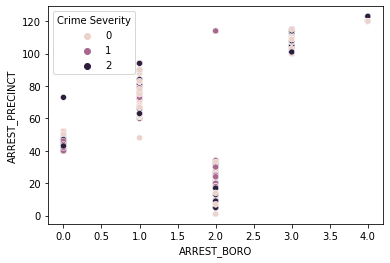

In [30]:
#plot showing crime severoty when arrest precinct and boro are plotted together
sns.scatterplot(data=df, x=df.ARREST_BORO, y=df.ARREST_PRECINCT, hue =df['Crime Severity'])

<AxesSubplot:ylabel='ARREST_BORO'>

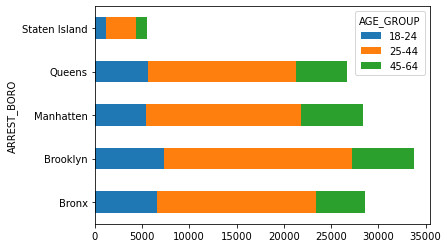

In [31]:
#Bar plot showing proportion of crimes committed per age group at each boro
pd.crosstab(data['ARREST_BORO'], data['AGE_GROUP']).plot(kind="barh",stacked=True)

In [32]:
#Lets do the same stats but with ARREST BORO and age group
two_way_table = pd.crosstab(index=data["ARREST_BORO"], columns=data["AGE_GROUP"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 320.2693296138679
p-value : 1.985476663212746e-64
degrees of freedom : 8


AGE_GROUP,18-24,25-44,45-64
ARREST_BORO,,,
Bronx,8.096570,1.984839,-10.688969
Brooklyn,2.698632,0.943463,-3.908639
Manhatten,-10.465856,-2.305622,13.497753
Queens,-0.962030,1.124454,-0.399255
Staten Island,0.885296,-3.611335,3.529307


In [33]:
#use chi significance function
chi_significant(p)

significance=0.050, p=0.000
Dependent (reject H0)


The Chi-Square test above shows that there is a significant relationship on the dependency between crime severity and the age group, meaning there is a distribution of crime.

1. Bronx (0) - Crimes are more likely to occur in the 18-24 and the 25-44 age groups, sig more in 18-24
2. Brooklyn (1) - Crimes are significantly more likely to be committed byt the 18-24 age group and slightly in the 25-44 age group
3. Manhatten (2) - Crimes are significantly more likely to be committed by the 45 to 64 age group
4. Queens (3) - Crimes are significantly but slightly more likely to be committed by the 25-44 age group
5. Staten Island (4) - Crimes are more significantly to be committed by the 45-64 age group, ad slightly in the 18-24 age group.

Common trends we can see:

    The 18-24 age group are more likely to commit crimes in Bronx and Brooklyn. While the 45 to 64 age group are more likely to do crime in Manhatten and State Island (more signigicantly than the 18-24 age group.  And the 25-44 more likely to commit crime in the Bronx, Queens and Brooklyn.
    
Common covid-related trends we can see:

    It is interesting to note that the highest significance is in the 45 to 64 age group in Manhatten.  

In [34]:
#perform one-way ANOVA 
f_oneway(df['ARREST_BORO'], df['AGE_GROUP'], df['PERP_RACE'])

F_onewayResult(statistic=108180.4949654675, pvalue=0.0)

Yes we have signifcance in the boroughs with our demographics

<AxesSubplot:ylabel='ARREST_BORO'>

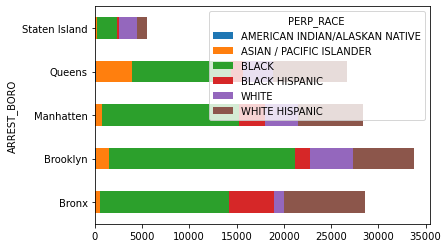

In [36]:
#Bar plot showing proportion of crimes committed per rae at each boro
pd.crosstab(data['ARREST_BORO'], data['PERP_RACE']).plot(kind="barh",stacked=True)

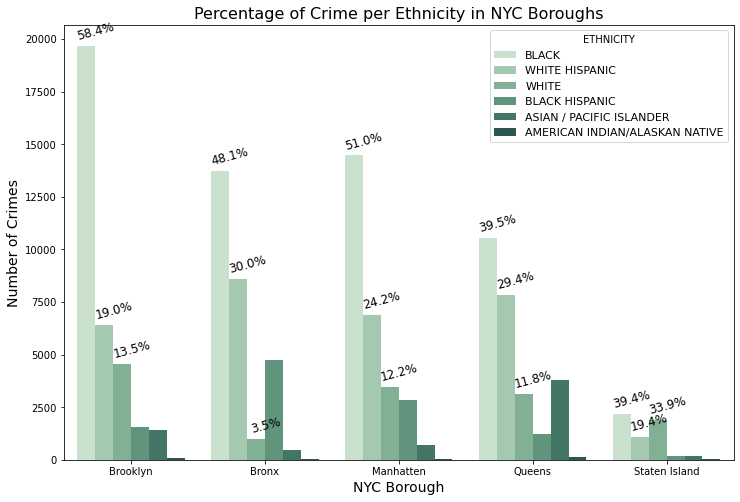

In [37]:
#Calculating the percentage of crime severity at each borough
boro_name = ['Manhatten', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
race = ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 
        'BLACK', 'BLACK HISPANIC', 'WHITE','WHITE HISPANIC']
subtotal_boro = data.groupby('ARREST_BORO')['PERP_RACE'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="ARREST_BORO", hue="PERP_RACE", 
                   data=data[['ARREST_BORO', 'PERP_RACE']], 
                   order = subtotal_boro.index,
                  palette = "ch:2.5,-.2,dark=.3")

ax.set_xlabel('NYC Borough', fontsize = 14)
ax.set_ylabel('Number of Crimes', fontsize = 14)
ax.set_title('Percentage of Crime per Ethnicity in NYC Boroughs', fontsize = 16)
#ax._legend.set_title('Ethnicity', fontsize=12)
ax.legend(title = "ETHNICITY", fontsize = 11)

#calculate percentage to anntotate
boro_num2 = [val for val in range(0, 5)]*3 #[0,1,2,3,4,0,1,2,3,4...] work for the order
for p, i in zip(ax.patches, boro_num2):
    percent = p.get_height()/subtotal_boro[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+300), 
                ha='center', size=12, rotation = 15)

In [38]:
#Lets do the same stats but with ARREST BORO and age group
two_way_table = pd.crosstab(index=data["ARREST_BORO"], columns=data["PERP_RACE"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 15149.841653302996
p-value : 0.0
degrees of freedom : 20


PERP_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
ARREST_BORO,,,,,,
Bronx,-2.469828,-32.022229,-4.844893,54.980856,-48.220679,22.286282
Brooklyn,-1.043089,-10.830476,39.148885,-30.221651,13.991917,-30.134400
Manhatten,-2.416572,-24.503219,6.332989,9.045901,4.705367,-3.622720
Queens,6.058497,72.641702,-36.241381,-25.856538,2.213550,18.543052
Staten Island,0.145703,-6.022147,-15.182051,-13.906414,53.992500,-10.006127


In [39]:
#use chi significance function
chi_significant(p)

significance=0.050, p=0.000
Dependent (reject H0)


American Indian/Alaskan Native = 0
ASIAN / PACIFIC ISLANDER = 1
BLACK = 2
BLACK HISPANIC = 3
WHITE = 4
WHITE HISPANIC = 5

The Chi-Square test above shows that there is a significant relationship on the dependency between crime severity and the ethnicities, meaning there is a distribution of crime.

1. Bronx (0) - Crimes are more likely to be committed by Black Hispanic and White Hispanics
2. Brooklyn (1) - Crimes are significantly more likely to be committed by Black and White, sig more Black
3. Manhatten (2) - Crimes are significantly more likely to be committed by Black, Black Hispanic & White, Sig more black hispanic
4. Queens (3) - Crimes are significantly more likely to be committed by Asian, white hispanic, Indeginous and white (respectively), most sig more Asian
5. Staten Island (4) - Crimes are more significantly to be committed by whites, with very slightly significant indeginous.

Common trends we can see:

    Trends may be tied more to economics. Queens and Staten are more expensive, so more likely to occur by Asian, white hispanic & Whites.
    
Common covid-related trends we can see:

    There was also a BLM movement (that started May 26th) that might also affect the crimes and why we might see more increase in Black crimes. 
    

#### Relations with Crime Severity

<AxesSubplot:ylabel='ARREST_PRECINCT'>

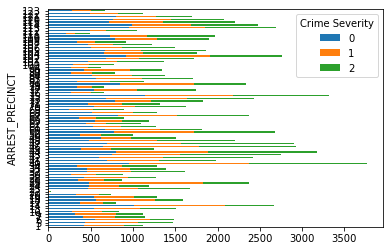

In [42]:
#Bar plot showing proportion of crimes committed per age group at each precinct
pd.crosstab(df['ARREST_PRECINCT'], df['Crime Severity']).plot(kind="barh",stacked=True)

In [43]:
#Seperate data into boroughs
Bronx = df.loc[df['ARREST_BORO'] == 0]
Brooklyn = df.loc[df['ARREST_BORO'] == 1]
Manhatten = df.loc[df['ARREST_BORO'] == 2]
Queens = df.loc[df['ARREST_BORO'] == 3]
Staten = df.loc[df['ARREST_BORO'] == 4]

Now do each precinct in each borough

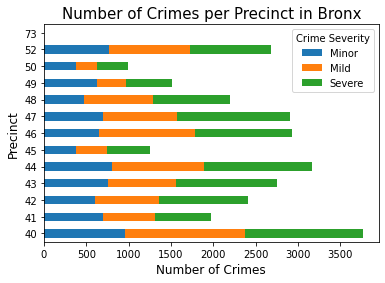

In [44]:
#plot Precints in Bronx with crime severity
pd.crosstab(Bronx['ARREST_PRECINCT'], 
            Bronx['Crime Severity']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Precinct', size = 12)
plt.title('Number of Crimes per Precinct in Bronx', size= 15)
plt.legend(['Minor','Mild','Severe'], title = 'Crime Severity')
plt.show()

In [45]:
#Lets do the same stats but with ARREST BORO and age group
two_way_table = pd.crosstab(index=Bronx["Crime Severity"], columns=Bronx["ARREST_PRECINCT"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 534.0062121328104
p-value : 1.4149688986583054e-97
degrees of freedom : 24


ARREST_PRECINCT,40,41,42,43,44,45,46,47,48,49,50,52,73
Crime Severity,,,,,,,,,,,,,
0,-2.852009,8.229144,-2.807760,0.218010,-2.637405,2.894634,-6.636213,-4.030708,-6.192827,12.448753,7.332212,1.983606,-0.070718
1,6.599123,-2.021673,-1.615308,-4.186124,1.749036,-3.431664,7.087070,-3.683651,3.970761,-8.248194,-5.052199,2.734522,-0.238771
2,-3.741949,-5.541284,4.103520,3.820383,0.718923,0.662492,-0.769718,7.201011,1.818748,-3.400466,-1.816532,-4.428612,0.293514


#### Note
This is an example of how we can select our Precincts.

If we just want to focus on severe crime then in the Bronx maybe precincts 42, 43, 47 and 48 could be something to look at.

Or we can go based on the bar plot and select precincts based on crime count.

In [46]:
#perform one-way ANOVA 
f_oneway(Bronx['ARREST_PRECINCT'], Bronx['Crime Severity']) #significant difference between precincts with crime severity

F_onewayResult(statistic=3978727.7922203946, pvalue=0.0)

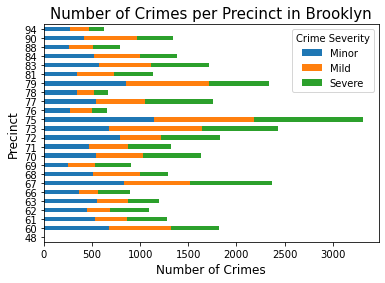

In [47]:
#plot Precints in Brooklyn with crime severity
pd.crosstab(Brooklyn['ARREST_PRECINCT'], 
            Brooklyn['Crime Severity']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Precinct', size = 12)
plt.title('Number of Crimes per Precinct in Brooklyn', size= 15)
plt.legend(['Minor','Mild','Severe'], title = 'Crime Severity')
plt.show()

In [48]:
#perform one-way ANOVA 
f_oneway(Brooklyn['ARREST_PRECINCT'], Brooklyn['Crime Severity']) #significant difference between precincts with crime severity

F_onewayResult(statistic=2551941.3687700187, pvalue=0.0)

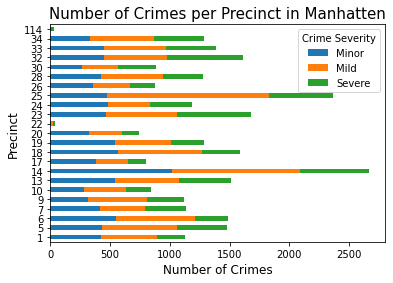

In [49]:
#plot Precints in Manhatten with crime severity
pd.crosstab(Manhatten['ARREST_PRECINCT'], 
            Manhatten['Crime Severity']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Precinct', size = 12)
plt.title('Number of Crimes per Precinct in Manhatten', size= 15)
plt.legend(['Minor','Mild','Severe'], title = 'Crime Severity')
plt.show()

In [50]:
#perform one-way ANOVA 
f_oneway(Manhatten['ARREST_PRECINCT'], Manhatten['Crime Severity']) #significant difference between precincts with crime severity

F_onewayResult(statistic=91230.71791835951, pvalue=0.0)

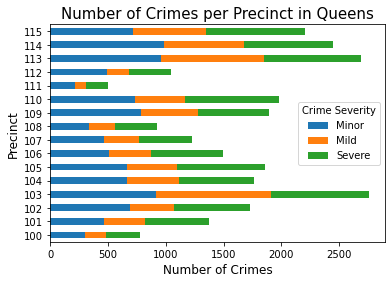

In [51]:
#plot Precints in Queens with crime severity
pd.crosstab(Queens['ARREST_PRECINCT'], 
            Queens['Crime Severity']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Precinct', size = 12)
plt.title('Number of Crimes per Precinct in Queens', size= 15)
plt.legend(['Minor','Mild','Severe'], title = 'Crime Severity')
plt.show()

In [52]:
#perform one-way ANOVA 
f_oneway(Queens['ARREST_PRECINCT'], Queens['Crime Severity']) #significant difference between precincts with crime severity

F_onewayResult(statistic=13235959.554685911, pvalue=0.0)

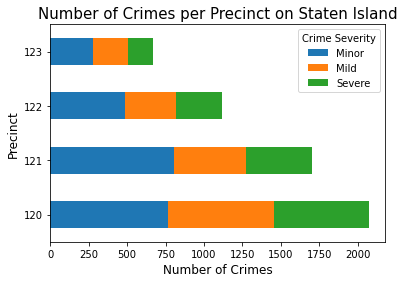

In [53]:
#plot Precints on Staten Island with crime severity
pd.crosstab(Staten['ARREST_PRECINCT'], 
            Staten['Crime Severity']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Precinct', size = 12)
plt.title('Number of Crimes per Precinct on Staten Island', size= 15)
plt.legend(['Minor','Mild','Severe'], title = 'Crime Severity')
plt.show()

In [54]:
#perform one-way ANOVA 
f_oneway(Staten['ARREST_PRECINCT'], Staten['Crime Severity']) #significant difference between precincts with crime severity

F_onewayResult(statistic=46742904.69876357, pvalue=0.0)

In all boroughs, there is a significant difference with the number of crimes per precinct and crime severity

In [56]:
### Relations with demographic factors

We aren't focusing too much on demographics for this assignment, so I will just do some basic one-way ANOVAS

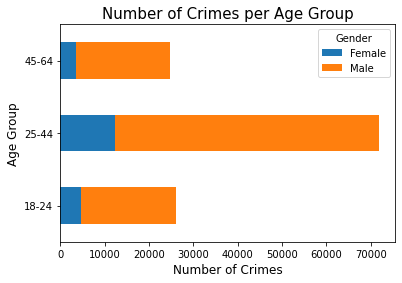

In [57]:
#plot gender by Age group
pd.crosstab(data['AGE_GROUP'], 
            data['PERP_SEX']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Age Group', size = 12)
plt.title('Number of Crimes per Age Group', size= 15)
plt.legend(['Female','Male'], title = 'Gender')
plt.show()

In [58]:
#perform one-way ANOVA 
f_oneway(df['AGE_GROUP'], df['PERP_SEX']) #significant difference between age and sex

F_onewayResult(statistic=5478.377280457816, pvalue=0.0)

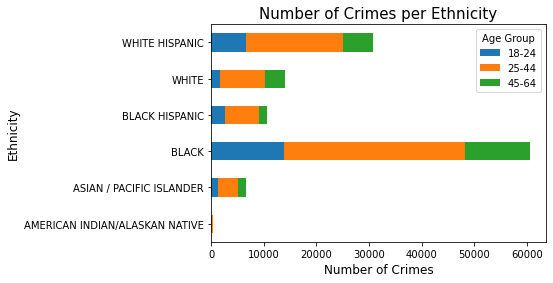

In [59]:
#plot ethnicity by sex
pd.crosstab(data['PERP_RACE'], 
            data['AGE_GROUP']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Ethnicity', size = 12)
plt.title('Number of Crimes per Ethnicity', size= 15)
plt.legend(['18-24','25-44','45-64'], title = 'Age Group')
plt.show()

In [60]:
#perform one-way ANOVA 
f_oneway(df['AGE_GROUP'], df['PERP_RACE']) #significant difference between age and race

F_onewayResult(statistic=221146.3968998617, pvalue=0.0)

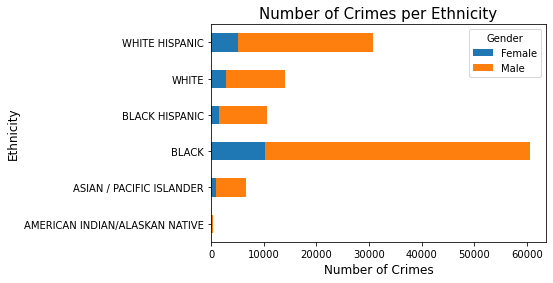

In [61]:
#plot ethnicity by sex
pd.crosstab(data['PERP_RACE'], 
            data['PERP_SEX']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Ethnicity', size = 12)
plt.title('Number of Crimes per Ethnicity', size= 15)
plt.legend(['Female','Male'], title = 'Gender')
plt.show()

In [62]:
#perform one-way ANOVA 
f_oneway(df['PERP_RACE'], df['PERP_SEX']) #significant difference between race and sex

F_onewayResult(statistic=292497.9194363878, pvalue=0.0)

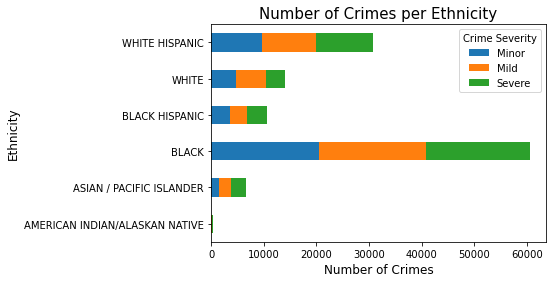

In [63]:
#plot ethnicity by crime severity
pd.crosstab(data['PERP_RACE'], 
            data['Crime Severity']).plot(kind="barh",stacked=True)
plt.xlabel('Number of Crimes', size = 12)
plt.ylabel('Ethnicity', size = 12)
plt.title('Number of Crimes per Ethnicity', size= 15)
plt.legend(['Minor','Mild','Severe'], title = 'Crime Severity')
plt.show()

In [64]:
#perform one-way ANOVA 
f_oneway(df['PERP_RACE'], df['Crime Severity']) #significant difference between race and crime severity

F_onewayResult(statistic=197512.65504866964, pvalue=0.0)